In [1]:
import sqlite3
engine = sqlite3.connect('sql4.db')

In [2]:
cursor = engine.cursor()

cursor.execute("PRAGMA foreign_keys = ON").fetchall()

### cursor.execute("PRAGMA foreign_keys").fetchall()

### fetchall - método que retorna 

[]

### Syntax:
### "CREATE [TEMP | TEMPORARY] TABLE table-name (
### column-def[, column-def]
### [,constraint]);

### column-def:
### name [type] [[CONSTRAINT name] column-constraint]"

In [3]:
sql_create_projects_table = 'CREATE TABLE IF NOT EXISTS projects (\
                                        id integer PRIMARY KEY,\
                                        name text NOT NULL,\
                                        begin_date text,\
                                        end_date text\
                                    )'

In [4]:
sql_create_tasks_table = """CREATE TABLE IF NOT EXISTS tasks (
                                    id integer PRIMARY KEY,
                                    name text NOT NULL,
                                    priority integer,
                                    status_id integer NOT NULL,
                                    project_id integer NOT NULL REFERENCES projects (id),
                                    begin_date text NOT NULL,
                                    end_date text NOT NULL
                                );"""
# StudentId INT REFERENCES Student (StudentId)
#FOREIGN KEY (project_id) REFERENCES projects (id)

In [5]:
### Command execute #####
cursor.execute(sql_create_projects_table)

In [6]:
#### Commit #####
engine.commit()

In [7]:
cursor.execute("PRAGMA table_info(projects)").fetchall()

[(0, 'id', 'integer', 0, None, 1),
 (1, 'name', 'text', 1, None, 0),
 (2, 'begin_date', 'text', 0, None, 0),
 (3, 'end_date', 'text', 0, None, 0)]

In [8]:
data = cursor.execute('PRAGMA table_info(projects)').fetchall()
type(data)

list

In [9]:
data = cursor.execute('PRAGMA table_info(projects)').fetchall()
type(data[0]) #cada posição da lista é uma tupla

tuple

In [10]:
data = cursor.execute('PRAGMA table_info(projects)').fetchall()
type(data[0])
for d in data:
  print(d[0],d[1],d[2])

0 id integer
1 name text
2 begin_date text
3 end_date text


In [11]:
cursor.execute(sql_create_tasks_table)

In [12]:
#### Types de cada atributo da Tabela ####### 
#### Comando PRAGMA table_info("Nome da tabela") 
sql_info = 'PRAGMA table_info (tasks)'
data = cursor.execute(sql_info).fetchall()
for d in data:
  print(d[0],d[1],d[2])

0 id integer
1 name text
2 priority integer
3 status_id integer
4 project_id integer
5 begin_date text
6 end_date text


## SYNTAX (INSERT): 

### "INSERT [OR conflict-algorithm]
### INTO [database-name .] table-name [(column-list)]
### VALUES (value-list)"

In [13]:
### Comando Insert ##### 
### INSERT INTO table VALUES () 
### INSERT INTO table (columns) VALUES () 


In [14]:
sql_insert = 'INSERT INTO projects VALUES(20, "PROJETO_01", "2021-07-18", " ")'
cursor.execute(sql_insert)

In [15]:
engine.commit()

In [16]:
sql_insert2 = 'INSERT INTO projects (name, begin_date, end_date) VALUES("PROJETO_02", " ", " ") '
cursor.execute(sql_insert2)
engine.commit()

In [17]:
sql_insert3 = 'INSERT INTO projects (name) VALUES("PROJETO_03") '
cursor.execute(sql_insert3)
engine.commit()

In [18]:
 #### Comando SELECT #####
 ###. SELECT * FROM table #####
data = cursor.execute('SELECT * FROM projects ').fetchall()
for row in data: 
  print(row)

(20, 'PROJETO_01', '2021-07-18', ' ')
(21, 'PROJETO_02', ' ', ' ')
(22, 'PROJETO_03', None, None)


In [19]:
### INSERT values into Task ###### 
sql_insert3 = 'INSERT INTO tasks VALUES(100, "tarefa_01", 0, 20, 22, " ", " ") '
cursor.execute(sql_insert3)
engine.commit()

In [20]:
### LER os valores inseridos #######
cursor.execute('SELECT * FROM tasks').fetchall()

[(100, 'tarefa_01', 0, 20, 22, ' ', ' ')]

## SYNTAX (SELECT): 

### SELECT [ALL | DISTINCT] result [FROM table-list]
### [WHERE expr]
### [GROUP BY expr-list]
### [HAVING expr]
### [compound-op select]*
### [ORDER BY sort-expr-list]
### [LIMIT integer [(OFFSET|,) integer]]

In [21]:
### CREATE TABLE EMP and DEPTO #######
cursor.execute('''CREATE TABLE IF NOT EXISTS EMP (EMPNO int, ENAME text, JOB text, MGR int, HIREDATE date, SAL real,COMM int, DEPTNO int)''')

In [22]:
data = cursor.execute("PRAGMA table_info(EMP)").fetchall()
for d in data:
    print (d[0], d[1], d[2])

0 EMPNO int
1 ENAME text
2 JOB text
3 MGR int
4 HIREDATE date
5 SAL real
6 COMM int
7 DEPTNO int


In [23]:
 employes = [(7369, 'SMITH',  'CLERK', 7902, '2005-12-11', 800, 150 , 20),
 (7499, 'ALLEN',  'SALESMAN', 7698, '2006-02-23',1600, 300, 30),
 (7521, 'WARD', 'SALESMAN', 7698,'2006-02-26', 1250, 500, 30),
 (7566, 'JONES','MANAGER', 7839,'2006-04-02', 2975, 520, 20),            
 (7654, 'MARTIN','SALESMAN', 7698,'2006-09-28', 1400, 420, 30),
 (7698, 'BLAKE','MANAGER', 7839,'2006-05-1', 2850, 600, 30),
 (7782, 'CLARK', 'MANAGER', 7839, '2006-06-09',2450, 580,10),
 (7788, 'SCOTT', 'ANALYST', 7566,'2007-12-09',3000,640,20),
 (7839, 'KING','PRESIDENT','', '2006-11-17',5000,0,10),
 (7844, 'TURNER', 'SALESMAN',7698,'2006-09-13',1500,0,30),
 (7876, 'ADAMS', 'CLERK',7788, '2008-01-12',1100,50,20),
 (7900, 'JAMES', 'CLERK',7698, '2006-12-03',950,40,30),
 (7902, 'FORD', 'ANALYST',7566,'2006-12-03',3000,10,20),
 (7934, 'MILLER','CLERK',7782,'2007-01-23',1300,"",10)]

In [24]:
type(employes[0])

tuple

In [25]:
cursor.executemany('INSERT INTO EMP VALUES (?,?,?,?,?,?,?,?)', employes)
engine.commit()

In [26]:
#### READ THE CONTENTS OF EMP TABLE 
cursor.execute('SELECT * FROM EMP').fetchall()

[(7369, 'SMITH', 'CLERK', 7902, '2005-12-11', 800.0, 150, 20),
 (7499, 'ALLEN', 'SALESMAN', 7698, '2006-02-23', 1600.0, 300, 30),
 (7521, 'WARD', 'SALESMAN', 7698, '2006-02-26', 1250.0, 500, 30),
 (7566, 'JONES', 'MANAGER', 7839, '2006-04-02', 2975.0, 520, 20),
 (7654, 'MARTIN', 'SALESMAN', 7698, '2006-09-28', 1400.0, 420, 30),
 (7698, 'BLAKE', 'MANAGER', 7839, '2006-05-1', 2850.0, 600, 30),
 (7782, 'CLARK', 'MANAGER', 7839, '2006-06-09', 2450.0, 580, 10),
 (7788, 'SCOTT', 'ANALYST', 7566, '2007-12-09', 3000.0, 640, 20),
 (7839, 'KING', 'PRESIDENT', '', '2006-11-17', 5000.0, 0, 10),
 (7844, 'TURNER', 'SALESMAN', 7698, '2006-09-13', 1500.0, 0, 30),
 (7876, 'ADAMS', 'CLERK', 7788, '2008-01-12', 1100.0, 50, 20),
 (7900, 'JAMES', 'CLERK', 7698, '2006-12-03', 950.0, 40, 30),
 (7902, 'FORD', 'ANALYST', 7566, '2006-12-03', 3000.0, 10, 20),
 (7934, 'MILLER', 'CLERK', 7782, '2007-01-23', 1300.0, '', 10)]

In [27]:
cursor.execute('''CREATE TABLE DEPT
             (DEPTNO int not null, DNAME  text, LOC text)''')

In [28]:
depts = [(10,'ACCOUNTING','NEW YORK'),
         (20,'RESEARCH','DALLAS'),
         (30,'SALES','CHICAGO'),
         (40,'OPERATIONS','BOSTON')] 


In [29]:
type(depts)

list

In [30]:
cursor.executemany('INSERT INTO DEPT VALUES (?,?,?)', depts)

In [31]:
cursor.execute('SELECT * FROM DEPT').fetchall()

[(10, 'ACCOUNTING', 'NEW YORK'),
 (20, 'RESEARCH', 'DALLAS'),
 (30, 'SALES', 'CHICAGO'),
 (40, 'OPERATIONS', 'BOSTON')]

In [32]:
### SELECT - Filtrando por atributos (Colunas) ##### 

data = cursor.execute('select ename as NAME, job as JOB_A from emp').fetchall()
print(cursor.description[0][0],"     ",cursor.description[1][0])
#for x in cursor.description: 
#    print(x[0])
for row in data: 
  print(row)


NAME       JOB_A
('SMITH', 'CLERK')
('ALLEN', 'SALESMAN')
('WARD', 'SALESMAN')
('JONES', 'MANAGER')
('MARTIN', 'SALESMAN')
('BLAKE', 'MANAGER')
('CLARK', 'MANAGER')
('SCOTT', 'ANALYST')
('KING', 'PRESIDENT')
('TURNER', 'SALESMAN')
('ADAMS', 'CLERK')
('JAMES', 'CLERK')
('FORD', 'ANALYST')
('MILLER', 'CLERK')


In [33]:
cursor.description

(('NAME', None, None, None, None, None, None),
 ('JOB_A', None, None, None, None, None, None))

In [34]:
### Retrieving a Subset of Rows from a Table #### 
#### SELECT xxxx FROM TABLE Where clause ####

In [35]:
sql_select = 'SELECT ename FROM emp WHERE deptno < 30'
cursor.execute(sql_select).fetchall()

[('SMITH',),
 ('JONES',),
 ('CLARK',),
 ('SCOTT',),
 ('KING',),
 ('ADAMS',),
 ('FORD',),
 ('MILLER',)]

In [36]:
### Ex 2 - Count ###3

In [37]:
sql_selectCount = 'SELECT count(deptno) FROM emp WHERE deptno = 20'
cursor.execute(sql_selectCount).fetchall()

[(5,)]

In [38]:
sql_selectAVG = 'SELECT avg(sal) FROM emp'
cursor.execute(sql_selectAVG).fetchall()

[(2083.9285714285716,)]

In [39]:
sql_selectAVG = 'SELECT avg(sal) FROM emp WHERE job = "SALESMAN"'
cursor.execute(sql_selectAVG).fetchall()

[(1437.5,)]

In [40]:
### emp.groupby('sal').mean() ###

In [41]:
### Ex 3 - DISTINCT ###

In [42]:
sql_distinct = 'SELECT DISTINCT job FROM emp'
cursor.execute(sql_distinct).fetchall()

[('CLERK',), ('SALESMAN',), ('MANAGER',), ('ANALYST',), ('PRESIDENT',)]

### SYNTAX (UPDATE): 

### UPDATE table_name SET column_name=new_value [, ...] WHERE expression

In [43]:
### Modificar salário ->. sal = 1.10*sal para o departamento 20##### 

In [44]:
sql_update = 'UPDATE emp SET sal = 1.10*sal WHERE deptno = 20'
cursor.execute (sql_update).fetchall()

[]

In [45]:
cursor.execute('SELECT sal FROM emp WHERE deptno = 20').fetchall()

[(880.0000000000001,),
 (3272.5000000000005,),
 (3300.0000000000005,),
 (1210.0,),
 (3300.0000000000005,)]

In [46]:
#### Using Conditional Logic in a SELECT Statement #### 
### CASE WHEN condição (sal<=2000) THEN faz alguma ação ("UNDERPAID")
### WHEN outra condição xxx THEN uma outra ação
### ELSE executa última ação
### END fecha a cláusula do case

In [47]:
cursor.execute ('SELECT ename, sal, CASE WHEN sal <= 2000 then "UNDERPAID"\
                WHEN sal >= 4000 THEN "OVERPAID"\
                ELSE "OK" END as status from emp').fetchall()

[('SMITH', 880.0000000000001, 'UNDERPAID'),
 ('ALLEN', 1600.0, 'UNDERPAID'),
 ('WARD', 1250.0, 'UNDERPAID'),
 ('JONES', 3272.5000000000005, 'OK'),
 ('MARTIN', 1400.0, 'UNDERPAID'),
 ('BLAKE', 2850.0, 'OK'),
 ('CLARK', 2450.0, 'OK'),
 ('SCOTT', 3300.0000000000005, 'OK'),
 ('KING', 5000.0, 'OVERPAID'),
 ('TURNER', 1500.0, 'UNDERPAID'),
 ('ADAMS', 1210.0, 'UNDERPAID'),
 ('JAMES', 950.0, 'UNDERPAID'),
 ('FORD', 3300.0000000000005, 'OK'),
 ('MILLER', 1300.0, 'UNDERPAID')]

In [48]:
### Limiting the Number of Rows Returned #### 

In [49]:
sql_selectLIMIT = 'SELECT * FROM emp LIMIT 15'
cursor.execute(sql_selectLIMIT).fetchall()

[(7369, 'SMITH', 'CLERK', 7902, '2005-12-11', 880.0000000000001, 150, 20),
 (7499, 'ALLEN', 'SALESMAN', 7698, '2006-02-23', 1600.0, 300, 30),
 (7521, 'WARD', 'SALESMAN', 7698, '2006-02-26', 1250.0, 500, 30),
 (7566, 'JONES', 'MANAGER', 7839, '2006-04-02', 3272.5000000000005, 520, 20),
 (7654, 'MARTIN', 'SALESMAN', 7698, '2006-09-28', 1400.0, 420, 30),
 (7698, 'BLAKE', 'MANAGER', 7839, '2006-05-1', 2850.0, 600, 30),
 (7782, 'CLARK', 'MANAGER', 7839, '2006-06-09', 2450.0, 580, 10),
 (7788, 'SCOTT', 'ANALYST', 7566, '2007-12-09', 3300.0000000000005, 640, 20),
 (7839, 'KING', 'PRESIDENT', '', '2006-11-17', 5000.0, 0, 10),
 (7844, 'TURNER', 'SALESMAN', 7698, '2006-09-13', 1500.0, 0, 30),
 (7876, 'ADAMS', 'CLERK', 7788, '2008-01-12', 1210.0, 50, 20),
 (7900, 'JAMES', 'CLERK', 7698, '2006-12-03', 950.0, 40, 30),
 (7902, 'FORD', 'ANALYST', 7566, '2006-12-03', 3300.0000000000005, 10, 20),
 (7934, 'MILLER', 'CLERK', 7782, '2007-01-23', 1300.0, '', 10)]

In [50]:
### Returning Valores aleatórios #####

In [51]:
sql_selectRandom = 'SELECT ename, job FROM emp ORDER BY random() LIMIT 5'
cursor.execute(sql_selectRandom).fetchall()

[('MILLER', 'CLERK'),
 ('ALLEN', 'SALESMAN'),
 ('SMITH', 'CLERK'),
 ('TURNER', 'SALESMAN'),
 ('SCOTT', 'ANALYST')]

In [52]:
## Searching for Patterns ####
## Ex1 - range

In [53]:
sql_selectIn = 'SELECT ename, job FROM emp WHERE deptno IN (10,20)'
cursor.execute(sql_selectIn).fetchall()

[('SMITH', 'CLERK'),
 ('JONES', 'MANAGER'),
 ('CLARK', 'MANAGER'),
 ('SCOTT', 'ANALYST'),
 ('KING', 'PRESIDENT'),
 ('ADAMS', 'CLERK'),
 ('FORD', 'ANALYST'),
 ('MILLER', 'CLERK')]

In [54]:
## Searching for Patterns ####
## Ex2 - substring ##### 

In [55]:
sql_selectLIKE = 'SELECT ename, job FROM emp WHERE deptno IN (10,20) AND (ename LIKE "%I%" OR job LIKE "%ER%")'
cursor.execute(sql_selectLIKE).fetchall()

[('SMITH', 'CLERK'),
 ('JONES', 'MANAGER'),
 ('CLARK', 'MANAGER'),
 ('KING', 'PRESIDENT'),
 ('ADAMS', 'CLERK'),
 ('MILLER', 'CLERK')]

In [56]:
sql_selectLIKE = 'SELECT ename, job FROM emp WHERE deptno IN (10,20) AND (ename LIKE "%I%" AND job LIKE "%ER%")'
cursor.execute(sql_selectLIKE).fetchall()

[('SMITH', 'CLERK'), ('MILLER', 'CLERK')]

In [57]:
sql_selectLIKE = 'SELECT ename, job FROM emp WHERE deptno IN (10,20) AND (job LIKE "%AN%")'
cursor.execute(sql_selectLIKE).fetchall()

[('JONES', 'MANAGER'),
 ('CLARK', 'MANAGER'),
 ('SCOTT', 'ANALYST'),
 ('FORD', 'ANALYST')]

#### %% - pesquisa em qualquer posição

#### %x - pesquisa no final

#### x% - pesquisa no início

In [58]:
#### Order by ### 
### Ascendent ###
#sql_selectORDERBY = 'SELECT ename,job,sal FROM emp WHERE deptno IN (10,20) ORDER BY sal ASC'
sql_selectORDERBY = 'SELECT ename,job,sal FROM emp WHERE deptno IN (10,20) ORDER BY sal DESC'
cursor.execute(sql_selectORDERBY).fetchall()

[('KING', 'PRESIDENT', 5000.0),
 ('SCOTT', 'ANALYST', 3300.0000000000005),
 ('FORD', 'ANALYST', 3300.0000000000005),
 ('JONES', 'MANAGER', 3272.5000000000005),
 ('CLARK', 'MANAGER', 2450.0),
 ('MILLER', 'CLERK', 1300.0),
 ('ADAMS', 'CLERK', 1210.0),
 ('SMITH', 'CLERK', 880.0000000000001)]

In [59]:
### Achar datas a partir de 2000 ###

In [60]:
sql_selectHIREDATE = 'SELECT hiredate FROM emp WHERE hiredate LIKE "20%"'
cursor.execute(sql_selectHIREDATE).fetchall()

[('2005-12-11',),
 ('2006-02-23',),
 ('2006-02-26',),
 ('2006-04-02',),
 ('2006-09-28',),
 ('2006-05-1',),
 ('2006-06-09',),
 ('2007-12-09',),
 ('2006-11-17',),
 ('2006-09-13',),
 ('2008-01-12',),
 ('2006-12-03',),
 ('2006-12-03',),
 ('2007-01-23',)]

In [61]:
#### ORDER BY SUBSTRING ##### 
### substr( string, start, length ) ##### 

### length(str) - retorna o tamanho da string = número de caracteres
### length(Nicolly) = 7 ; lly - substring(Nicolly,3,2) = co

In [62]:
select_order_by_substring = 'SELECT ename FROM emp ORDER BY ename ASC'
cursor.execute(select_order_by_substring).fetchall()

[('ADAMS',),
 ('ALLEN',),
 ('BLAKE',),
 ('CLARK',),
 ('FORD',),
 ('JAMES',),
 ('JONES',),
 ('KING',),
 ('MARTIN',),
 ('MILLER',),
 ('SCOTT',),
 ('SMITH',),
 ('TURNER',),
 ('WARD',)]

In [63]:
select_order_by_substring = 'SELECT ename FROM emp ORDER BY substr(ename, 2, 3)'
cursor.execute(select_order_by_substring).fetchall()

[('JAMES',),
 ('WARD',),
 ('MARTIN',),
 ('SCOTT',),
 ('ADAMS',),
 ('MILLER',),
 ('KING',),
 ('BLAKE',),
 ('CLARK',),
 ('ALLEN',),
 ('SMITH',),
 ('JONES',),
 ('FORD',),
 ('TURNER',)]

In [64]:
### selecionar nomes terminando com RK ou TH

In [65]:
sql_substring = 'SELECT ename FROM emp WHERE substr(ename, length(ename)-1) IN ("TH", "RK")'
cursor.execute(sql_substring).fetchall()

[('SMITH',), ('CLARK',)]

In [85]:
sql_cast = 'SELECT CAST(hiredate as datetime) FROM emp'
data = cursor.execute(sql_cast).fetchall()
for row in data: 
  print(row)

(2005,)
(2006,)
(2006,)
(2006,)
(2006,)
(2006,)
(2006,)
(2007,)
(2006,)
(2006,)
(2008,)
(2006,)
(2006,)
(2007,)
(8,)


In [86]:
type(data[0][0])

int

In [66]:
#### SELECT 
###. group by using native functions - COUNT and AVG
###  O que quero selecionar (atributos) 
### Por quem quero agrupar 

In [67]:
sql_groupby = 'SELECT job, COUNT (job) FROM emp GROUP BY job'
cursor.execute(sql_groupby).fetchall()

[('ANALYST', 2),
 ('CLERK', 4),
 ('MANAGER', 3),
 ('PRESIDENT', 1),
 ('SALESMAN', 4)]

### Quero obter o resultado abaixo, no entanto os atributos são de colunas diferentes

 
ENAME       LOC\
----------  ----------\
CLARK        NEW YORK\
KING         NEW YORK\
MILLER       NEW YORK

In [68]:
cursor.execute('PRAGMA table_info(dept)').fetchall()

[(0, 'DEPTNO', 'int', 1, None, 0),
 (1, 'DNAME', 'text', 0, None, 0),
 (2, 'LOC', 'text', 0, None, 0)]

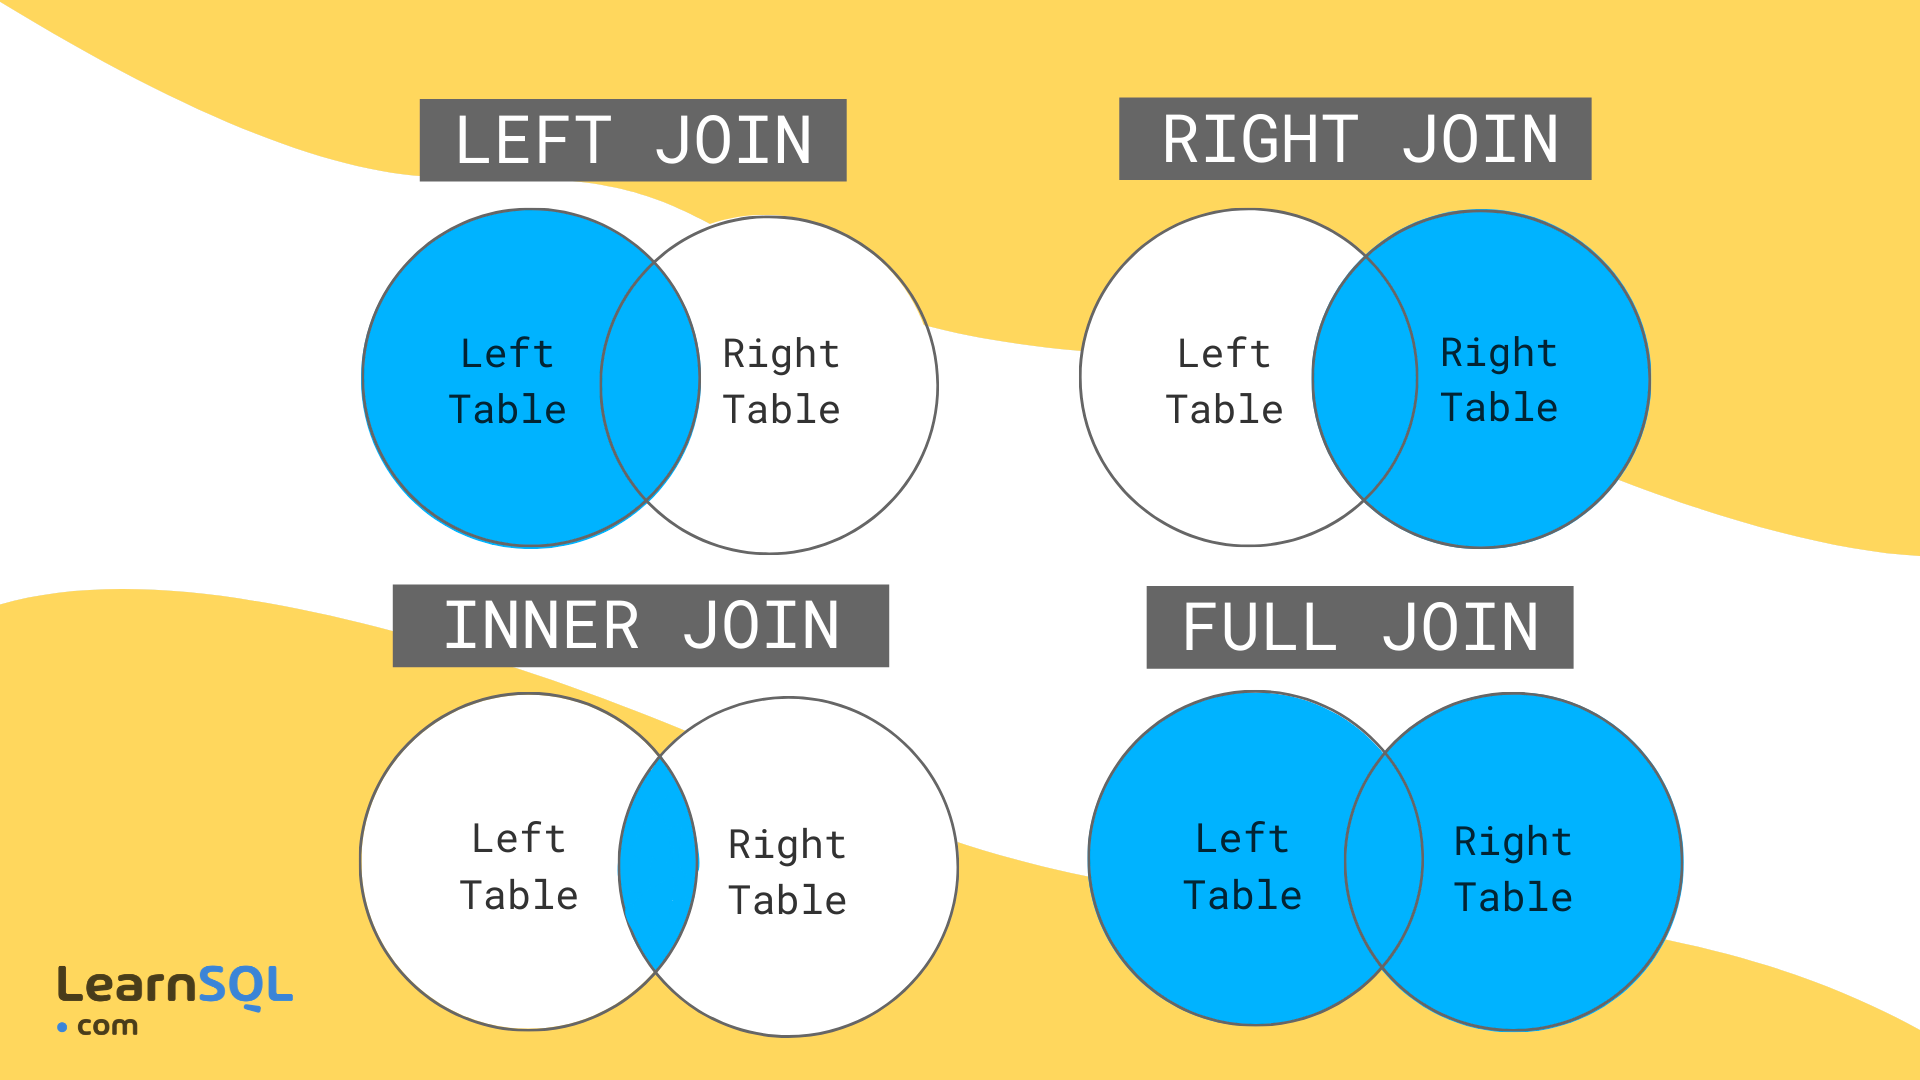

In [69]:
### Selecionar todos os infos dos empregados e departamentos - mesmo departamentos_ID

In [70]:
sql_ImplicitJoin = 'SELECT ename, loc FROM emp, dept WHERE emp.deptno = dept.deptno'
cursor.execute(sql_ImplicitJoin).fetchall()

[('SMITH', 'DALLAS'),
 ('ALLEN', 'CHICAGO'),
 ('WARD', 'CHICAGO'),
 ('JONES', 'DALLAS'),
 ('MARTIN', 'CHICAGO'),
 ('BLAKE', 'CHICAGO'),
 ('CLARK', 'NEW YORK'),
 ('SCOTT', 'DALLAS'),
 ('KING', 'NEW YORK'),
 ('TURNER', 'CHICAGO'),
 ('ADAMS', 'DALLAS'),
 ('JAMES', 'CHICAGO'),
 ('FORD', 'DALLAS'),
 ('MILLER', 'NEW YORK')]

In [71]:
### Selecionar somente os Nomes dos empregados e os nomes dos departamentos 

In [76]:
sql_ImplicitJoin2 = 'SELECT ename, dname FROM emp, dept WHERE emp.deptno = dept.deptno'
cursor.execute(sql_ImplicitJoin2).fetchall()

[('SMITH', 'RESEARCH'),
 ('ALLEN', 'SALES'),
 ('WARD', 'SALES'),
 ('JONES', 'RESEARCH'),
 ('MARTIN', 'SALES'),
 ('BLAKE', 'SALES'),
 ('CLARK', 'ACCOUNTING'),
 ('SCOTT', 'RESEARCH'),
 ('KING', 'ACCOUNTING'),
 ('TURNER', 'SALES'),
 ('ADAMS', 'RESEARCH'),
 ('JAMES', 'SALES'),
 ('FORD', 'RESEARCH'),
 ('MILLER', 'ACCOUNTING')]

In [77]:
sql_ImplicitJoin3 = 'SELECT e.ename, d.dname FROM emp e, dept d WHERE e.deptno = d.deptno'
cursor.execute(sql_ImplicitJoin3).fetchall()

[('SMITH', 'RESEARCH'),
 ('ALLEN', 'SALES'),
 ('WARD', 'SALES'),
 ('JONES', 'RESEARCH'),
 ('MARTIN', 'SALES'),
 ('BLAKE', 'SALES'),
 ('CLARK', 'ACCOUNTING'),
 ('SCOTT', 'RESEARCH'),
 ('KING', 'ACCOUNTING'),
 ('TURNER', 'SALES'),
 ('ADAMS', 'RESEARCH'),
 ('JAMES', 'SALES'),
 ('FORD', 'RESEARCH'),
 ('MILLER', 'ACCOUNTING')]

In [72]:
#### INNER JOIN ##### 
###  In SQLite, the INNER JOIN selects all rows from both participating tables 
##   to appear in the result if and only if both tables meet the conditions specified 
##  in the ON clause
## SELECT [result] from Tables [clausla de condicao ou comparacao]
## SELECT [results] from [1a Tabela] INNER JOIN [2a Tabela] ON [condicao de JOIN]

In [78]:
sql_InnerJoin = 'SELECT e.ename, d.dname FROM emp e INNER JOIN dept d ON e.deptno = d.deptno'
cursor.execute(sql_InnerJoin).fetchall()

[('SMITH', 'RESEARCH'),
 ('ALLEN', 'SALES'),
 ('WARD', 'SALES'),
 ('JONES', 'RESEARCH'),
 ('MARTIN', 'SALES'),
 ('BLAKE', 'SALES'),
 ('CLARK', 'ACCOUNTING'),
 ('SCOTT', 'RESEARCH'),
 ('KING', 'ACCOUNTING'),
 ('TURNER', 'SALES'),
 ('ADAMS', 'RESEARCH'),
 ('JAMES', 'SALES'),
 ('FORD', 'RESEARCH'),
 ('MILLER', 'ACCOUNTING')]

In [82]:
cursor.execute('PRAGMA table_info(emp)').fetchall()

[(0, 'EMPNO', 'int', 0, None, 0),
 (1, 'ENAME', 'text', 0, None, 0),
 (2, 'JOB', 'text', 0, None, 0),
 (3, 'MGR', 'int', 0, None, 0),
 (4, 'HIREDATE', 'date', 0, None, 0),
 (5, 'SAL', 'real', 0, None, 0),
 (6, 'COMM', 'int', 0, None, 0),
 (7, 'DEPTNO', 'int', 0, None, 0)]

In [73]:
### INSERT  PARA TESTAR LEFT OUTER####

In [79]:
sql_insert4 = 'INSERT INTO emp VALUES (20501, "CHARLES", "ANALYST", 2900, "08-20-2021", 2000, 10, 50)'

In [80]:
cursor.execute(sql_insert4)
cursor.execute('SELECT * FROM emp WHERE empno = 20501').fetchall()

[(20501, 'CHARLES', 'ANALYST', 2900, '08-20-2021', 2000.0, 10, 50)]

In [74]:
#### LEFT OUTER JOIN #### 
###  The Left Join or Left Outer Join operation takes two relations, A and B, and returns
###  the inner join of A and B along with the unmatched rows of A
## SELECT [results] from [1a Tabela] LEFT JOIN [2a Tabela] ON [condicao de JOIN]

In [81]:
sql_LeftJoin = 'SELECT e.ename, d.dname FROM emp e LEFT JOIN dept d ON e.deptno = d.deptno'
cursor.execute(sql_LeftJoin).fetchall()

[('SMITH', 'RESEARCH'),
 ('ALLEN', 'SALES'),
 ('WARD', 'SALES'),
 ('JONES', 'RESEARCH'),
 ('MARTIN', 'SALES'),
 ('BLAKE', 'SALES'),
 ('CLARK', 'ACCOUNTING'),
 ('SCOTT', 'RESEARCH'),
 ('KING', 'ACCOUNTING'),
 ('TURNER', 'SALES'),
 ('ADAMS', 'RESEARCH'),
 ('JAMES', 'SALES'),
 ('FORD', 'RESEARCH'),
 ('MILLER', 'ACCOUNTING'),
 ('CHARLES', None)]

In [75]:
#### CROSS JOIN or CARTESIAN JOIN ####     
###  The Cartesian join is one of the fundamental relational operations. 
###  It is a kind of join that results in the combination of all rows from the 
##   first table with all rows in the second.
## SELECT [results] from [1a Tabela] CROSS JOIN [2a Tabela]

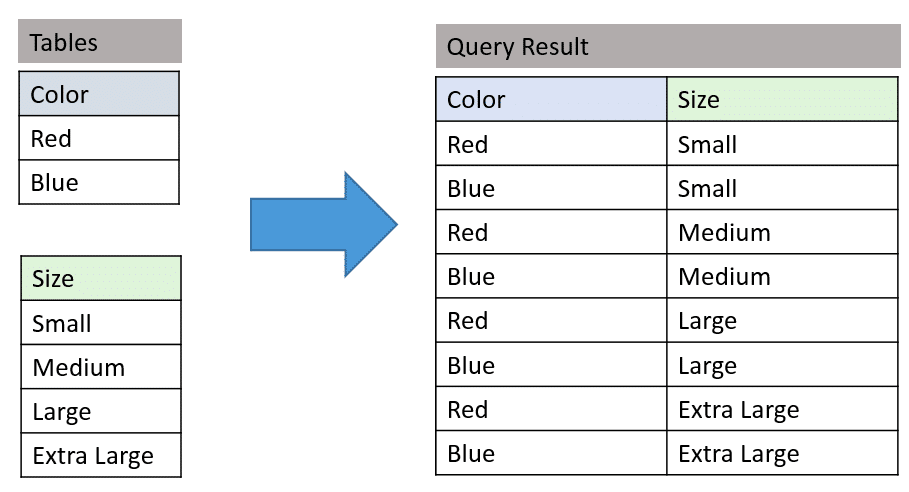

In [84]:
sql_CrossJoin = 'SELECT * FROM emp CROSS JOIN dept'
data = cursor.execute(sql_CrossJoin).fetchall()
for row in data:
  print(row)

(7369, 'SMITH', 'CLERK', 7902, '2005-12-11', 880.0000000000001, 150, 20, 10, 'ACCOUNTING', 'NEW YORK')
(7369, 'SMITH', 'CLERK', 7902, '2005-12-11', 880.0000000000001, 150, 20, 20, 'RESEARCH', 'DALLAS')
(7369, 'SMITH', 'CLERK', 7902, '2005-12-11', 880.0000000000001, 150, 20, 30, 'SALES', 'CHICAGO')
(7369, 'SMITH', 'CLERK', 7902, '2005-12-11', 880.0000000000001, 150, 20, 40, 'OPERATIONS', 'BOSTON')
(7499, 'ALLEN', 'SALESMAN', 7698, '2006-02-23', 1600.0, 300, 30, 10, 'ACCOUNTING', 'NEW YORK')
(7499, 'ALLEN', 'SALESMAN', 7698, '2006-02-23', 1600.0, 300, 30, 20, 'RESEARCH', 'DALLAS')
(7499, 'ALLEN', 'SALESMAN', 7698, '2006-02-23', 1600.0, 300, 30, 30, 'SALES', 'CHICAGO')
(7499, 'ALLEN', 'SALESMAN', 7698, '2006-02-23', 1600.0, 300, 30, 40, 'OPERATIONS', 'BOSTON')
(7521, 'WARD', 'SALESMAN', 7698, '2006-02-26', 1250.0, 500, 30, 10, 'ACCOUNTING', 'NEW YORK')
(7521, 'WARD', 'SALESMAN', 7698, '2006-02-26', 1250.0, 500, 30, 20, 'RESEARCH', 'DALLAS')
(7521, 'WARD', 'SALESMAN', 7698, '2006-02-26', 1